Mean absolute error: 759.42
Mean squared error: 899432.04
Root mean squared error: 948.38
New values: (202302, 700), prediction: [[6591.65133412]]
New values: (202303, 700), prediction: [[6583.43362775]]
New values: (202304, 700), prediction: [[6575.21592138]]
New values: (202305, 700), prediction: [[6566.99821501]]
New values: (202306, 700), prediction: [[6558.78050865]]
New values: (202307, 700), prediction: [[6550.56280228]]
New values: (202302, 750), prediction: [[6820.90317116]]
New values: (202303, 750), prediction: [[6812.68546479]]
New values: (202304, 750), prediction: [[6804.46775843]]
New values: (202305, 750), prediction: [[6796.25005206]]
New values: (202306, 750), prediction: [[6788.03234569]]
New values: (202307, 750), prediction: [[6779.81463932]]
New values: (202302, 600), prediction: [[6133.14766003]]
New values: (202303, 600), prediction: [[6124.92995367]]
New values: (202304, 600), prediction: [[6116.7122473]]
New values: (202305, 600), prediction: [[6108.49454093]]

C:\Users\halik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\halik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\halik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\halik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWa

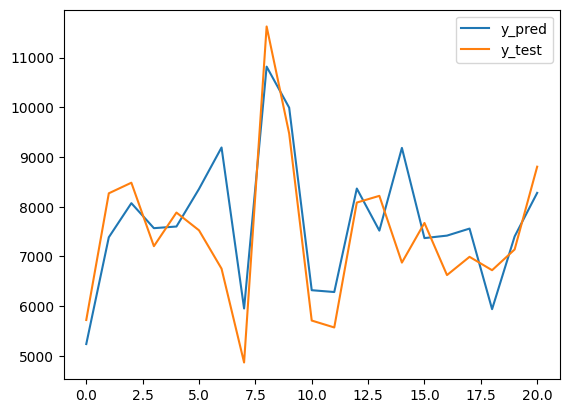

CPU times: total: 141 ms
Wall time: 236 ms


In [59]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

df = pd.read_csv(fr'C:\Users\halik\OneDrive\development\github\sws\code\repo.csv', delimiter=',')
#df.head(5)
#print(df.corr())
"""
# make a normalized copy of df
df_min_max_scaled = df.copy()
columns = ['repo', 'cena', 'doba', 'nove', 'zobrazeni']
for column in columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())	
display(df_min_max_scaled)
X= df_min_max_scaled[['datum', 'repo']]
Y= df_min_max_scaled[['aktivni']]
"""




#X= df[['datum', 'repo', 'cena', 'doba', 'nove', 'zobrazeni']]
X = df[['datum', 'repo']]
Y = df[['aktivni']]

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=90)
"""
train_set_size = 90
# Split the data into the train and test sets
df_train = df.iloc[:train_set_size, :]
df_test = df.iloc[train_set_size:, :]
print(df_train, df_test)
# Select the relevant columns for X and Y
X_train = df_train[['datum', 'repo']]
y_train = df_train[['aktivni']]
X_test = df_test[['datum', 'repo']]
y_test = df_test[['aktivni']]
"""



# Train the model on the train set
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict on the test set
y_pred = linreg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean absolute error: {mae:.2f}")
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")

# Refit the model on the entire dataset
linreg.fit(X, Y)

months = [202302,202303,202304,202305,202306,202307]
repos = [700, 750, 600, 500]
for repo in repos:
    for month in months:
        # Make predictions on new data
        x_new = [[month, repo]]
        y_new = linreg.predict(x_new)
        print(f"New values: {month, repo}, prediction: {y_new}")
        


import matplotlib.pyplot as plt

plt.plot(y_pred, label='y_pred')
#plt.plot(y_train.values, label='y_train')
plt.plot(y_test.values, label='y_test')
plt.legend()
plt.show()


Mean Absolute Error:  1229.7014039944308


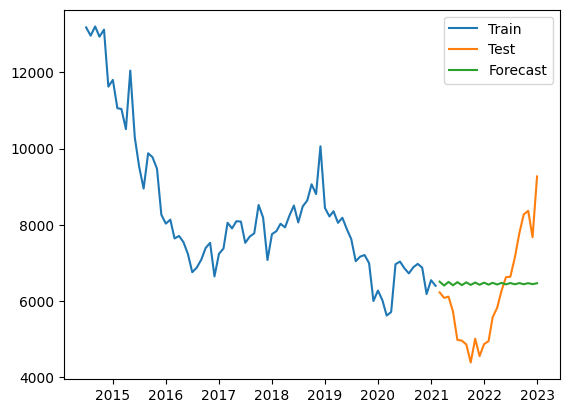

In [133]:
import pandas as pd

df = pd.read_csv(fr'C:\Users\halik\OneDrive\development\github\sws\code\repo.csv', delimiter=',')

# Convert the datum column to a datetime type
df['datum'] = pd.to_datetime(df['datum'], format='%Y%m')
df['year'] = df['datum'].dt.year
df['month'] = df['datum'].dt.month

# Set the datum column as the index of the DataFrame
df.set_index('datum', inplace=True)
df.index.freq = 'MS' # Set the frequency to monthly start

train = df[:80]
test = df[80:]

from pmdarima.arima import auto_arima

model = auto_arima(train['aktivni'], seasonal=True, suppress_warnings=True)

from sklearn.metrics import mean_absolute_error

forecast = model.predict(n_periods=12)

mae = mean_absolute_error(test['aktivni'][:len(forecast)], forecast)

print("Mean Absolute Error: ", mae)

import matplotlib.pyplot as plt

forecast = model.predict(n_periods=len(test))

plt.plot(train.index, train['aktivni'], label='Train')
plt.plot(test.index, test['aktivni'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()
